Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless Aggressive behavior and well being



Import Libraries & get url


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [3]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display

### get url

In [5]:

#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/s2hm-pruk.csv'

In [6]:
df = pd.read_csv(url)


In [7]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606463,12/07/2016 07:44:11 PM,NaN,12/08/2016 01:51:56 AM,Open,closed,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,Intersection of BEALE ST and BRYANT ST,6.0,Rincon Hill,"(37.7862236994829, -122.389636728846)",Open311,NaN
1,6606435,12/07/2016 07:40:57 PM,12/07/2016 08:29:35 PM,12/07/2016 08:29:35 PM,Closed,Case Resolved - Police Officer responded to request under CAD # 163423218. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"930 COLUMBUS AVE, SAN FRANCISCO, CA, 94133",3.0,North Beach,"(37.803104945971, -122.413926622677)",Open311,NaN
2,6606430,12/07/2016 07:40:33 PM,12/07/2016 11:06:06 PM,12/07/2016 11:06:06 PM,Closed,Case Resolved - Police Officer responded to request under CAD # 163423217. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"635 ELLIS ST, SAN FRANCISCO, CA, 94109",6.0,Tenderloin,"(37.784249072507, -122.416661124093)",Open311,NaN


In [8]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606463,2016-12-07 19:44:11,NaT,2016-12-08 01:51:56,Open,closed,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,Intersection of BEALE ST and BRYANT ST,6.0,Rincon Hill,"(37.7862236994829, -122.389636728846)",Open311,NaN
1,6606435,2016-12-07 19:40:57,2016-12-07 20:29:35,2016-12-07 20:29:35,Closed,Case Resolved - Police Officer responded to request under CAD # 163423218. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"930 COLUMBUS AVE, SAN FRANCISCO, CA, 94133",3.0,North Beach,"(37.803104945971, -122.413926622677)",Open311,NaN
2,6606430,2016-12-07 19:40:33,2016-12-07 23:06:06,2016-12-07 23:06:06,Closed,Case Resolved - Police Officer responded to request under CAD # 163423217. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"635 ELLIS ST, SAN FRANCISCO, CA, 94109",6.0,Tenderloin,"(37.784249072507, -122.416661124093)",Open311,NaN


In [10]:
df.Closed.dt.day.value_counts().sort_index()

1.0     51
2.0     69
3.0     58
4.0     60
5.0     53
6.0     50
7.0     52
8.0     29
9.0     24
10.0    23
11.0    47
12.0    23
13.0    26
14.0    28
15.0    36
16.0    28
17.0    25
18.0    20
19.0     6
20.0    14
21.0    24
22.0    19
23.0    28
24.0    14
25.0    11
26.0    12
27.0    25
28.0    32
29.0    33
30.0    36
31.0    14
Name: Closed, dtype: int64

In [11]:
df.Opened.dt.day.value_counts().sort_index()

1     52
2     67
3     65
4     53
5     56
6     55
7     48
8     25
9     28
10    25
11    48
12    21
13    30
14    35
15    28
16    28
17    23
18    24
19     6
20    12
21    27
22    23
23    31
24    12
25    11
26    12
27    28
28    43
29    28
30    40
31    16
Name: Opened, dtype: int64

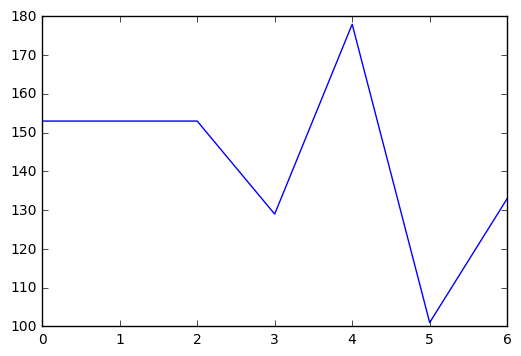

In [12]:
df.Opened.dt.weekday.value_counts().sort_index().plot()

In [13]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [24]:

df['Request Details'].value_counts()


homeless_concerns - aggressive_behavior - request_for_service    548
homeless_concerns - wellbeing_check - request_for_service        309
homeless_concerns - homeless_other - request_for_service         142
homeless_concerns - homeless_other - complaint                     1
Name: Request Details, dtype: int64

In [26]:
df['Responsible Agency'].value_counts()

Police - Homeless Concerns Queue                     930
DPW Ops Queue                                         38
Mayors Office of Neighborhood Services - G            14
311 Supervisor Queue                                  11
RPD Park Service Area 6 Queue                          3
DPW - Bureau of Street Environmental Services - G      1
HSA - Housing and Homeless - G                         1
SFMTA - Parking Enforcement - G                        1
RPD Park Service Area 5 Queue                          1
Name: Responsible Agency, dtype: int64

In [27]:
df['Status Notes'].describe()

count                                                             1000
unique                                                             804
top       Case Resolved - Unknown CAD Disposition, Default to Resolved
freq                                                               122
Name: Status Notes, dtype: object

In [15]:
df['Status Notes'].value_counts()

Case Resolved - Unknown CAD Disposition, Default to Resolved                                                                122
Insufficient Information - Insufficient infomation provided for action to be taken.                                          19
Case Resolved - Fire Department's medical staff engaged.                                                                     18
accepted                                                                                                                     16
sent                                                                                                                          8
Case Resolved - Contacted SFPD                                                                                                5
open                                                                                                                          5
Case Resolved - 10-98                                                                                   

In [16]:
df['Supervisor District'].value_counts().sort_index()



-1.0       1
 1.0      61
 2.0      24
 3.0     109
 4.0      11
 5.0      93
 6.0     278
 7.0       2
 8.0     129
 9.0     126
 10.0    159
 11.0      4
Name: Supervisor District, dtype: int64

In [17]:
df.Neighborhood.value_counts()

South of Market             163
Potrero Hill                127
Mission                     121
Castro                       75
Financial District           43
Civic Center                 42
Lower Nob Hill               32
Sutro Heights                28
Haight Ashbury               27
Tenderloin                   25
Rincon Hill                  23
Mission Dolores              18
Outer Richmond               16
Showplace Square             15
Polk Gulch                   13
Mission Bay                  11
Hayes Valley                 10
Japantown                     9
Duboce Triangle               8
Lower Pacific Heights         8
Cathedral Hill                8
Golden Gate Park              8
Russian Hill                  7
Inner Richmond                7
Bernal Heights                7
North Beach                   6
Marina                        6
Nob Hill                      6
Inner Sunset                  6
South Beach                   6
                           ... 
Lower Ha

In [18]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
20,6602753,2016-12-06 18:45:17,2016-12-07 00:36:57,2016-12-07 00:36:57,Closed,Case Resolved - Police Officer responded to request under CAD # 163413223. Advised of violation.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"580 YORK ST, SAN FRANCISCO, CA, 94110",10.0,Mission,"(37.762111439113, -122.409379734077)",Open311,NaN
21,6602750,2016-12-06 18:43:45,2016-12-07 00:35:17,2016-12-07 00:35:17,Closed,Case Resolved - Police Officer responded to request under CAD # 163413182. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"2048 BRYANT ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.761130420644, -122.410127826554)",Open311,NaN
43,6600084,2016-12-06 08:36:40,2016-12-06 12:27:06,2016-12-06 12:27:06,Closed,Case Resolved - Police Officer responded to request under CAD # 163410875. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"2953 22ND ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.755706539151, -122.413364408083)",Open311,NaN
72,6595866,2016-12-05 09:07:47,2016-12-05 12:08:41,2016-12-05 12:08:41,Closed,Case Resolved - Police Officer responded to request under CAD # 163401104. Advised of violation.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of ERIE ST and MISSION ST,9.0,Mission,"(37.7690454018668, -122.420032143074)",Web Self Service,NaN
73,6595863,2016-12-05 09:07:31,NaT,2016-12-05 09:07:31,Open,accepted,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,"1799 MISSION ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.768299648276, -122.419913931934)",Web Self Service,NaN
80,6595393,2016-12-05 07:52:15,2016-12-05 10:00:43,2016-12-05 10:00:43,Closed,Case Resolved - Police Officer responded to request under CAD # 163400712. Issue was addressed.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - wellbeing_check - request_for_service,homeless_concerns - wellbeing_check - request_for_service,Intersection of 20TH ST and FLORIDA ST,9.0,Mission,"(37.7591338604323, -122.410758686679)",Open311,NaN
86,6594478,2016-12-04 18:06:36,2016-12-04 23:55:43,2016-12-04 23:55:43,Closed,Case Resolved - Police Officer responded to request under CAD # 163393093. Individual(s) not found at location ...,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,"2048 BRYANT ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.761130420644, -122.410127826554)",Open311,NaN
94,6593656,2016-12-04 13:10:01,2016-12-04 23:59:00,2016-12-04 23:59:00,Closed,Case Resolved - Police Officer responded to request under CAD # 163392819. Issue was addressed.,Police - Homeless Concerns Queue,General Requests,homeless_concerns - aggressive_behavior - request_for_service,homeless_concerns - aggressive_behavior - request_for_service,Intersection of 18TH ST and FLORIDA ST,9.0,Mission,"(37.7617009755953, -122.411090102877)",Open311,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 



In [20]:
hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [21]:
#hl_images = df[df['Media URL'].notnull() ]

In [22]:
hl_images.head(4)

Series([], Name: Media URL, dtype: float64)

In [23]:
print(hl_images[0])
Image(hl_images[0])


IndexError: index out of bounds